In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

# Importing useful libraries
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [2]:
df = pd.read_csv("final_thyroid_1.csv")
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,Class
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,126.0,2.0,110.0,1
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,103.0,2.0,109.0,1
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,110.0,2.0,121.0,1
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,176.0,2.0,178.0,1
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,62.0,2.0,71.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13915,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,23.0,2.0,58.0,3
13916,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,23.0,2.0,58.0,3
13917,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,49.0,2.0,55.0,3
13918,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,49.0,2.0,55.0,3


In [3]:
x = df.drop(columns=['Class'])

In [4]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,126.0,2.0,110.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,103.0,2.0,109.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,110.0,2.0,121.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,176.0,2.0,178.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,62.0,2.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13915,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,23.0,2.0,58.0
13916,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,23.0,2.0,58.0
13917,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,49.0,2.0,55.0
13918,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,49.0,2.0,55.0


In [5]:
y = df.Class

In [6]:
y

0        1
1        1
2        1
3        1
4        1
        ..
13915    3
13916    3
13917    3
13918    3
13919    3
Name: Class, Length: 13920, dtype: int64

In [7]:
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size=0.75, random_state = 70)

## **XGBoost**

In [11]:
def xgboost(train_x,train_y):

     xgb = XGBClassifier()

     # initializing with different combination of parameters
     param_grid_xgboost = {'tree_method': ['auto'],
                  "n_estimators": [10, 100, 120],
                  'booster' : ['dart', 'gbtree'],
#                   "criterion": ['gini', 'entropy'],
                  "max_depth": [2,3],
#                   "max_features": ['auto', 'log2'],
                  # 'objective': ['binary:logistic'],
#                   'lambda' : range(1e-4,10),
                  'alpha' : (1e-4,1),
                  'colsample_bytree' : (.1, .5),
                  'subsample' : (.1, 1)



             }

     # object for Grid Search cv
     grid= GridSearchCV(xgb, param_grid_xgboost, n_jobs= -1, verbose=3, cv=5,)

     # finding the best parameters
     grid.fit(train_x, train_y)

     # getting best parameters
     booster = grid.best_params_['booster']
     tree_method = grid.best_params_['tree_method']
     n_estimators = grid.best_params_['n_estimators']
#      criterion = grid.best_params_['criterion']
     max_depth = grid.best_params_['max_depth']
#      max_features = grid.best_params_['max_features']
     # objective = grid.best_params_['objective']
#      lambda = grid.best_params_['lambda']
     alpha = grid.best_params_['alpha']
     colsample_bytree = grid.best_params_['colsample_bytree']
     subsample = grid.best_params_['colsample_bytree']


     # creating a new model with the best parameters
     xgb = XGBClassifier(booster=booster, tree_method=tree_method, n_estimators=n_estimators,
                                max_depth=max_depth, alpha=alpha,
                                colsample_bytree=colsample_bytree, subsample=subsample)

     # training the mew model
     xgb.fit(train_x, train_y)
     print('Best parameters for XGBoost: {}'.format (grid.best_params_))


     return xgb

In [12]:
xgb_classifier = xgboost(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for XGBoost: {'alpha': 1, 'booster': 'dart', 'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 120, 'subsample': 1, 'tree_method': 'auto'}


In [13]:
xgb_classifier.score(X_test, y_test)

0.9370689655172414

In [14]:
# Save the model to a file
with open('xgb_classifier.pkl', 'wb') as file:
    pickle.dump(xgb_classifier, file)

# **KNN**

In [15]:
def KNN(train_x, train_y):

    knn = KNeighborsClassifier()

    # Providing different combination of parameters
    param_grid_knn = {
        'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
        'leaf_size' : [10,17,24,28,30,35],
        'n_neighbors':[4,5,8,10,11],
        'p':[1,2]

    }


    # Object for Grid Search cv
    grid = GridSearchCV(knn, param_grid_knn, n_jobs= -1, cv=10, verbose=3)

    # finding the best parameters
    grid.fit(train_x, train_y)

    # getting best parameters
    algorithm =grid.best_params_['algorithm']
    leaf_size = grid.best_params_['leaf_size']
    n_neighbors = grid.best_params_['n_neighbors']
    p  = grid.best_params_['p']

    # creating a new model with the best parameters
    knn = KNeighborsClassifier(algorithm=algorithm, leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, n_jobs=-1)

    # training the mew model
    knn.fit(train_x, train_y)
    print('Best Parameters for KNN: {}'.format(grid.best_params_))
    return knn

In [16]:
knn_classifier = KNN(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Best Parameters for KNN: {'algorithm': 'kd_tree', 'leaf_size': 24, 'n_neighbors': 4, 'p': 2}


In [17]:
knn_classifier.score(X_test, y_test)

0.9508620689655173

In [18]:
# Save the model to a file
with open('knn_classifier.pkl', 'wb') as file:
    pickle.dump(knn_classifier, file)

# **Random forest**

In [19]:
def random_forest(train_x,train_y):

    rfc = RandomForestClassifier()

    # Providing different combination of parameters
    param_grid = {"n_estimators": [10, 20, 30,50, 70, 100, 120],
                  "criterion": ['gini', 'entropy'],
                  "max_depth": range(2, 4, 1),
                  "max_features": ['sqrt', 'log2'],
                  "ccp_alpha" : (1e-4, 10)



                 }

    # object for GridSearchCV
    grid = GridSearchCV(rfc, param_grid=param_grid, n_jobs= -1, verbose=3, cv=10)

    #finding the best parameters
    grid.fit(train_x, train_y)

    #getting best parameters
    criterion = grid.best_params_['criterion']
    max_depth = grid.best_params_['max_depth']
    ccp_alpha = grid.best_params_['ccp_alpha']
    max_features = grid.best_params_['max_features']
    n_estimators = grid.best_params_['n_estimators']


    #create new model with best parameters
    rfc = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion,
                                      max_depth=max_depth, ccp_alpha=ccp_alpha, max_features=max_features)
    # train new model
    rfc.fit(train_x, train_y)

    print('Best parameters for random forest are: {}'.format(grid.best_params_))

    return rfc


In [20]:
rfc_classifier = random_forest(X_train, y_train)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits
Best parameters for random forest are: {'ccp_alpha': 0.0001, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 120}


In [21]:
rfc_classifier.score(X_test, y_test)

0.825

In [22]:
# Save the model to a file
with open('rfc_classifier.pkl', 'wb') as file:
    pickle.dump(rfc_classifier, file)

# **SVC**

In [23]:
def support_vector(train_x, train_y):

    svc = SVC()

    # Providing different combination of parameters
    param_grid_svc = {
        'C': [0.1, 1, 10, 100], 
        'gamma': [0.001, 0.01, 0.1, 1], 
        'kernel': ['linear', 'rbf']
    }


    # Object for Grid Search cv
    grid = GridSearchCV(svc, param_grid_svc, n_jobs= -1, cv=10, verbose=3)

    # finding the best parameters
    grid.fit(train_x, train_y)

    # getting best parameters
    C =grid.best_params_['C']
    gamma = grid.best_params_['gamma']
    kernel = grid.best_params_['kernel']

    # creating a new model with the best parameters
    svc = SVC(C=C, gamma = gamma, kernel = kernel)

    # training the mew model
    svc.fit(train_x, train_y)
    print('Best Parameters for SVC: {}'.format(grid.best_params_))
    return svc


In [ ]:
svc_classifier = support_vector(X_train, y_train)

In [ ]:
svc_classifier.score(X_test, y_test)

In [ ]:
# Save the model to a file
with open('svc_classifier.pkl', 'wb') as file:
    pickle.dump(svc_classifier, file)

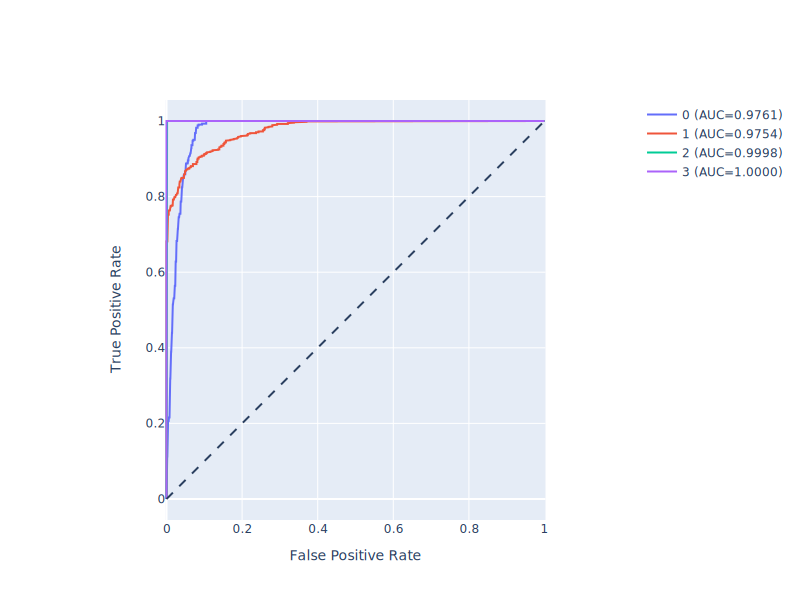

In [75]:
import plotly.graph_objects as go

classes = knn_classifier.classes_
roc_auc_ovr = {}
# Create an empty figure, and iteratively add new lines
# every time we compute a new class
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(X_test.copy(), columns= ['x', 'y'])
    df_aux['Class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    fpr, tpr, _ = roc_curve(df_aux['Class'], df_aux['prob'])
    roc_auc_ovr[c] = auc(fpr, tpr)

    name = f"{c} (AUC={roc_auc_ovr[c]:.4f})"
    fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=800, height=600,
    showlegend=True)
fig.show("svg")

# **Building model by feature importance**

## **ExtraTree classifier**

In [26]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 200,
                                        criterion ='entropy', max_features = 2, max_depth= 20)
  
# Training the model
extra_tree_forest.fit(X_train, y_train)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

Text(0.5, 1.0, 'Comparison of different Feature Importances')

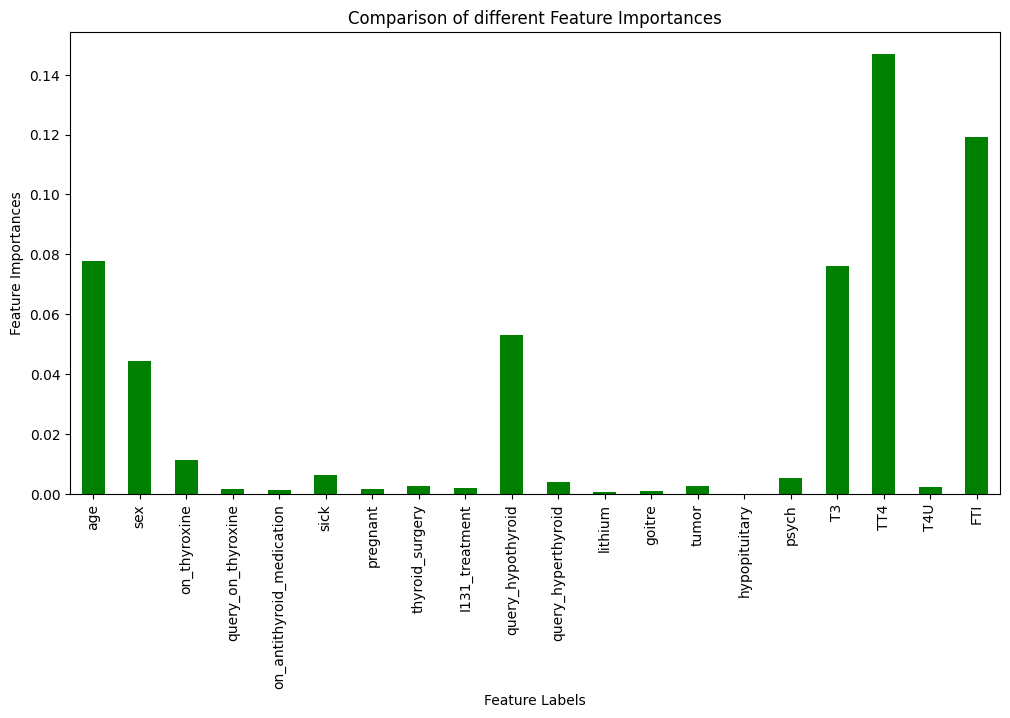

In [27]:
pd.Series(feature_importance_normalized, index= X_train.columns).plot.bar(color='green', figsize=(12, 6))
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')

In [28]:
X_train = X_train.drop(columns=['query_on_thyroxine',
       'on_antithyroid_medication', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'T4U' ])

In [29]:
X_train.columns

Index(['age', 'sex', 'on_thyroxine', 'sick', 'query_hypothyroid', 'psych',
       'T3', 'TT4', 'FTI'],
      dtype='object')

In [30]:
X_test = X_test.drop(columns=['query_on_thyroxine',
       'on_antithyroid_medication', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'T4U' ])

In [31]:
X_test.columns

Index(['age', 'sex', 'on_thyroxine', 'sick', 'query_hypothyroid', 'psych',
       'T3', 'TT4', 'FTI'],
      dtype='object')

In [37]:
def xgboost(train_x,train_y):

     xgb = XGBClassifier()

     # initializing with different combination of parameters
     param_grid_xgboost = {'tree_method': ['auto'],
                  "n_estimators": [10, 100, 120],
                  'booster' : ['dart', 'gbtree'],
#                   "criterion": ['gini', 'entropy'],
                  "max_depth": [2,3],
#                   "max_features": ['auto', 'log2'],
                  # 'objective': ['binary:logistic'],
#                   'lambda' : range(1e-4,10),
                  'alpha' : (1e-4,1),
                  'colsample_bytree' : (.1, .5),
                  'subsample' : (.1, 1)



             }

     # object for Grid Search cv
     grid= GridSearchCV(xgb, param_grid_xgboost, n_jobs= -1, verbose=3, cv=5,)

     # finding the best parameters
     grid.fit(train_x, train_y)

     # getting best parameters
     booster = grid.best_params_['booster']
     tree_method = grid.best_params_['tree_method']
     n_estimators = grid.best_params_['n_estimators']
#      criterion = grid.best_params_['criterion']
     max_depth = grid.best_params_['max_depth']
#      max_features = grid.best_params_['max_features']
     # objective = grid.best_params_['objective']
#      lambda = grid.best_params_['lambda']
     alpha = grid.best_params_['alpha']
     colsample_bytree = grid.best_params_['colsample_bytree']
     subsample = grid.best_params_['colsample_bytree']


     # creating a new model with the best parameters
     xgb = XGBClassifier(booster=booster, tree_method=tree_method, n_estimators=n_estimators,
                                max_depth=max_depth, alpha=alpha,
                                colsample_bytree=colsample_bytree, subsample=subsample)

     # training the mew model
     xgb.fit(train_x, train_y)
     print('Best parameters for XGBoost: {}'.format (grid.best_params_))


     return xgb

In [38]:
def random_forest(train_x,train_y):

    rfc = RandomForestClassifier()

    # Providing different combination of parameters
    param_grid = {"n_estimators": [10, 20, 30,50, 70, 100, 120],
                  "criterion": ['gini', 'entropy'],
                  "max_depth": range(2, 4, 1),
                  "max_features": ['sqrt', 'log2'],
                  "ccp_alpha" : (1e-4, 10)



                 }

    # object for GridSearchCV
    grid = GridSearchCV(rfc, param_grid=param_grid, n_jobs= -1, verbose=3, cv=10)

    #finding the best parameters
    grid.fit(train_x, train_y)

    #getting best parameters
    criterion = grid.best_params_['criterion']
    max_depth = grid.best_params_['max_depth']
    ccp_alpha = grid.best_params_['ccp_alpha']
    max_features = grid.best_params_['max_features']
    n_estimators = grid.best_params_['n_estimators']


    #create new model with best parameters
    rfc = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion,
                                      max_depth=max_depth, ccp_alpha=ccp_alpha, max_features=max_features)
    # train new model
    rfc.fit(train_x, train_y)

    print('Best parameters for random forest are: {}'.format(grid.best_params_))

    return rfc


In [39]:
def KNN(train_x, train_y):

    knn = KNeighborsClassifier()

    # Providing different combination of parameters
    param_grid_knn = {
        'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
        'leaf_size' : [10,17,24,28,30,35],
        'n_neighbors':[4,5,8,10,11],
        'p':[1,2]

    }


    # Object for Grid Search cv
    grid = GridSearchCV(knn, param_grid_knn, n_jobs= -1, cv=10, verbose=3)

    # finding the best parameters
    grid.fit(train_x, train_y)

    # getting best parameters
    algorithm =grid.best_params_['algorithm']
    leaf_size = grid.best_params_['leaf_size']
    n_neighbors = grid.best_params_['n_neighbors']
    p  = grid.best_params_['p']

    # creating a new model with the best parameters
    knn = KNeighborsClassifier(algorithm=algorithm, leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, n_jobs=-1)

    # training the mew model
    knn.fit(train_x, train_y)
    print('Best Parameters for KNN: {}'.format(grid.best_params_))
    return knn

In [40]:
def best_model(train_x,train_y,test_x,test_y):

            knn= KNN(train_x,train_y)
            prediction_knn = knn.predict_proba(test_x) # Predictions using the KNN Model

            if len(test_y.unique()) == 1: #if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
                knn_score = accuracy_score(test_y, prediction_knn)
                print('Accuracy for knn:' + str(knn_score))  # Log AUC
            else:
                knn_score = roc_auc_score(test_y, prediction_knn, multi_class='ovr') # AUC for KNN
                print('AUC for knn:' + str(knn_score)) # Log AUC

            # create best model for Random Forest
            r_f= random_forest(train_x,train_y)
            prediction_random_forest= r_f.predict_proba(test_x) # prediction using the Random Forest Algorithm

            if len(test_y.unique()) == 1:#if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
                random_forest_score = accuracy_score((test_y),prediction_random_forest)
                print('Accuracy for RF:' + str(random_forest_score))
            else:
                random_forest_score = roc_auc_score((test_y), prediction_random_forest,multi_class='ovr') # AUC for Random Forest
                print('AUC for RF:' + str(random_forest_score))
                
            # Create best model for XGBoost
            xgb = xgboost(train_x, train_y)
            prediction_xgb = xgb.predict_proba(test_x) #Prediction using XGBoost model
            
            if len(test_y.unique()) == 1: 
                xgb_score = accuracy_score(test_y, prediction_xgb)
                print('Accuracy for XGBoost:' +str(xgb_score))
                
            else:
                xgb_score = roc_auc_score((test_y), prediction_xgb, multi_class = 'ovr')
                print('AUC for xgb: ' +str(xgb_score))


            #Finding best model out of random forest, KNN and XGBoost                
            if (random_forest_score > knn_score) and (random_forest_score > xgb_score):
                return "RandomForest", r_f
            elif (knn_score >  random_forest_score) and (knn_score > xgb_score):
                return "KNN", knn
            else:
                return "XGBoost", xgb
  


In [41]:
best_model_name, final_model = best_model(X_train,y_train,X_test,y_test)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Best Parameters for KNN: {'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 4, 'p': 2}
AUC for knn:0.9853283048851597
Fitting 10 folds for each of 112 candidates, totalling 1120 fits
Best parameters for random forest are: {'ccp_alpha': 0.0001, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}
AUC for RF:0.9584521442582655
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for XGBoost: {'alpha': 1, 'booster': 'dart', 'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 120, 'subsample': 1, 'tree_method': 'auto'}
AUC for xgb: 0.9878143317521081


In [42]:
best_model_name

'XGBoost'

In [43]:
final_model

XGBClassifier(alpha=1, base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=None,
              num_parallel_tree=None, ...)

In [44]:
final_model.score(X_test,y_test)

0.9313218390804597

In [45]:
final_model.score(X_train, y_train)

0.9477011494252874

In [46]:
y_proba = final_model.predict_proba(X_test)
y_pred = final_model.predict(X_test)

In [47]:
print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

Macro Precision: 0.93
Macro Recall: 0.93
Macro F1-score: 0.93



In [48]:
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))


Weighted Precision: 0.94
Weighted Recall: 0.93
Weighted F1-score: 0.93


In [49]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = [0,1,2,3], 
                     columns = [0,1,2,3])

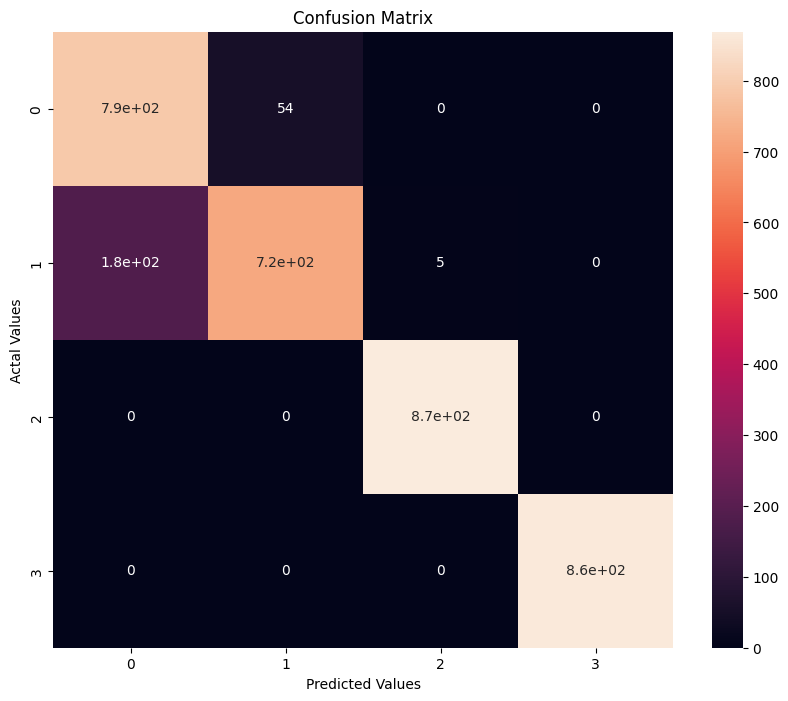

In [50]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [51]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3']))


Classification Report

              precision    recall  f1-score   support

     Class 0       0.81      0.94      0.87       844
     Class 1       0.93      0.80      0.86       904
     Class 2       0.99      1.00      1.00       869
     Class 3       1.00      1.00      1.00       863

    accuracy                           0.93      3480
   macro avg       0.93      0.93      0.93      3480
weighted avg       0.94      0.93      0.93      3480



In [55]:
from sklearn.metrics import auc

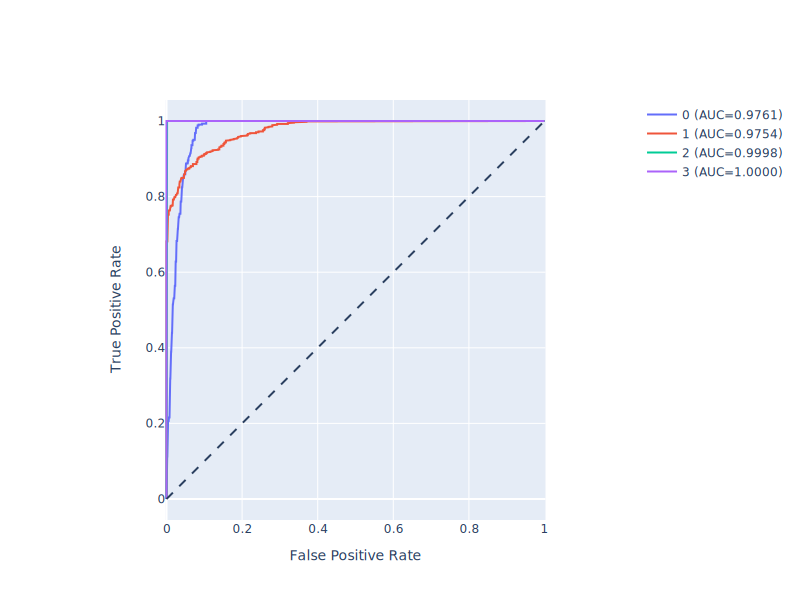

In [76]:
import plotly.graph_objects as go

classes = final_model.classes_
roc_auc_ovr = {}
# Create an empty figure, and iteratively add new lines
# every time we compute a new class
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(X_test.copy(), columns= ['x', 'y'])
    df_aux['Class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    fpr, tpr, _ = roc_curve(df_aux['Class'], df_aux['prob'])
    roc_auc_ovr[c] = auc(fpr, tpr)

    name = f"{c} (AUC={roc_auc_ovr[c]:.4f})"
    fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=800, height=600,
    showlegend=True)
fig.show("svg")

In [53]:
from sklearn.metrics import roc_auc_score

In [58]:
# Save the model to a file
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

In [59]:
np.array(X_test.head(10))

array([[ 42.,   1.,   0.,   0.,   1.,   0.,   3.,  23.,  58.],
       [ 69.,   0.,   0.,   0.,   1.,   0.,   2., 112.,  94.],
       [ 55.,   1.,   0.,   0.,   0.,   0.,   3.,  61.,  78.],
       [ 38.,   0.,   0.,   0.,   0.,   0.,   3.,  99., 113.],
       [ 47.,   0.,   0.,   0.,   0.,   0.,   2.,  49.,  55.],
       [ 45.,   1.,   0.,   0.,   0.,   0.,   2.,  87., 131.],
       [  3.,   0.,   0.,   0.,   0.,   0.,   3., 112., 137.],
       [ 47.,   0.,   0.,   0.,   0.,   0.,   2.,  49.,  55.],
       [ 62.,   1.,   0.,   0.,   0.,   0.,   2.,  84., 102.],
       [ 42.,   1.,   0.,   0.,   1.,   0.,   3.,  23.,  58.]])

In [70]:
predictions = final_model.predict([[ 42.,   1.,   0.,   0.,   1.,   0.,   3.,  23.,  58.],
       [ 69.,   0.,   0.,   0.,   1.,   0.,   2., 112.,  94.],
       [ 55.,   1.,   0.,   0.,   0.,   0.,   3.,  61.,  78.],
       [ 38.,   0.,   0.,   0.,   0.,   0.,   3.,  99., 113.],
       [ 47.,   0.,   0.,   0.,   0.,   0.,   2.,  49.,  55.],
       [ 45.,   1.,   0.,   0.,   0.,   0.,   2.,  87., 131.],
       [  3.,   0.,   0.,   0.,   0.,   0.,   3., 112., 137.],
       [ 47.,   0.,   0.,   0.,   0.,   0.,   2.,  49.,  55.],
       [ 62.,   1.,   0.,   0.,   0.,   0.,   2.,  84., 102.],
       [ 42.,   1.,   0.,   0.,   1.,   0.,   3.,  23.,  58.]])
print(f"predictions of the best model is: {predictions}")

predictions of the best model is: [3 0 0 0 3 0 2 3 0 3]


In [67]:
y_test.head(10)

13614    3
6345     0
4926     0
4838     0
10847    3
6185     0
1686     2
10727    3
3797     0
11971    3
Name: Class, dtype: int64

In [74]:
input_data = eval(input('Give health parameters of the person: '))

#changing the input data to numpy_array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#predicting the condition of patient
prediction = final_model.predict(input_data_reshaped)
print(prediction)

if (prediction == 0):
    print('compensated_hypothyroid')

elif (prediction == 1):
    print('negative')

elif (prediction == 2):
    print('primary_hypothyroid')

else:
    print('secondary_hypothyroid')

Give health parameters of the person:  62.,   1.,   0.,   0.,   0.,   0.,   2.,  84., 102.


[0]
compensated_hypothyroid


In [73]:
# while True:

#     input_data = eval(input('Give health parameters of the person: '))
    
#     #changing the input data to numpy_array
#     input_data_as_numpy_array = np.asarray(input_data)
    
#     #reshape the array as we are predicting for one instance
#     input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
    
#     #predicting the condition of patient
#     prediction = final_model.predict(input_data_reshaped)
#     print(prediction)
    
#     if (prediction == 0):
#         print('compensated_hypothyroid')
    
#     elif (prediction == 1):
#         print('negative')
    
#     elif (prediction == 2):
#         print('primary_hypothyroid')
    
#     else:
#         print('secondary_hypothyroid')